In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


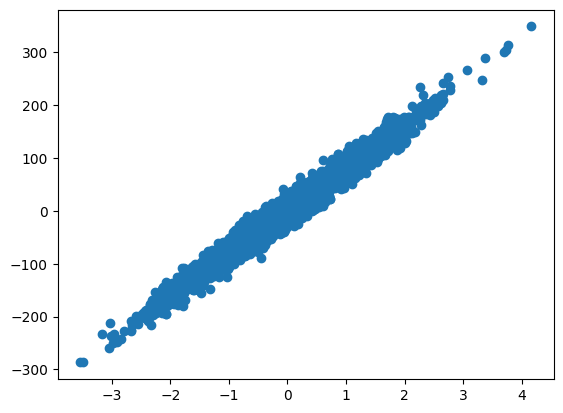

In [6]:
# Loading the data

x = pd.read_csv('data/Linear_X_Train.csv')
y = pd.read_csv('data/Linear_Y_Train.csv')

# Convert to numpy
x = x.values
y = y.values

# Normalising

u = x.mean()
sd = x.std()
x = (x-u)/sd

# Visualization
plt.scatter(x,y)

## Linear Regression

Using Iterative Method

In [45]:
def hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(X[i],theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
    return grad/m

def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2

    return (total_error/m)

def gradientDescent(X,Y,max_steps=100,learning_rate = 0.1):
    theta = np.zeros((2,))
    error_list = []
    theta_list = []

    for i in range(max_steps):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        theta_list.append((theta[0],theta[1]))
        error_list.append(e)

        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
    return theta,error_list,theta_list



In [46]:
theta,error_list,theta_list = gradientDescent(x,y)

C:\Users\anmol\AppData\Local\Temp\ipykernel_9032\62535222.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[0] += (y_ - y)
C:\Users\anmol\AppData\Local\Temp\ipykernel_9032\62535222.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[1] += (y_ - y)*x


In [20]:
theta

array([ 0.6838508 , 79.90361453])

In [21]:
error_list

[array([6576.35005246]),
 array([5363.12510257]),
 array([4380.41289317]),
 array([3584.41600355]),
 array([2939.65852295]),
 array([2417.40496367]),
 array([1994.37958066]),
 array([1651.72902041]),
 array([1374.18206661]),
 array([1149.36903404]),
 array([967.27047765]),
 array([819.77064698]),
 array([700.29578413]),
 array([603.52114523]),
 array([525.13368772]),
 array([461.63984713]),
 array([410.20983626]),
 array([368.55152745]),
 array([334.80829731]),
 array([307.47628091]),
 array([285.33734761]),
 array([267.40481165]),
 array([252.87945752]),
 array([241.11392067]),
 array([231.58383582]),
 array([223.8644671]),
 array([217.61177843]),
 array([212.54710061]),
 array([208.44471157]),
 array([205.12177646]),
 array([202.43019901]),
 array([200.25002128]),
 array([198.48407732]),
 array([197.05366271]),
 array([195.89502687]),
 array([194.95653185]),
 array([194.19635088]),
 array([193.58060429]),
 array([193.08184956]),
 array([192.67785822]),
 array([192.35062524]),
 array(

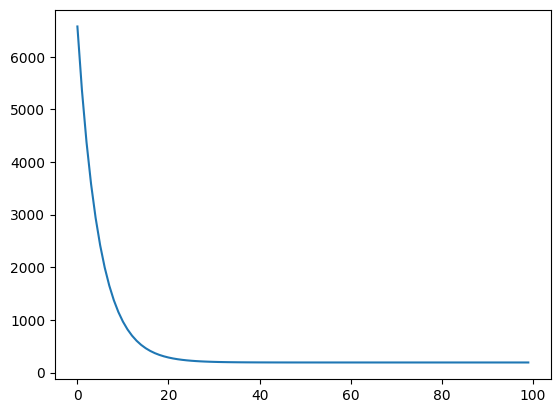

In [22]:
plt.plot(error_list)

## Predictions and Best Line

In [24]:
y_ = hypothesis(x,theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


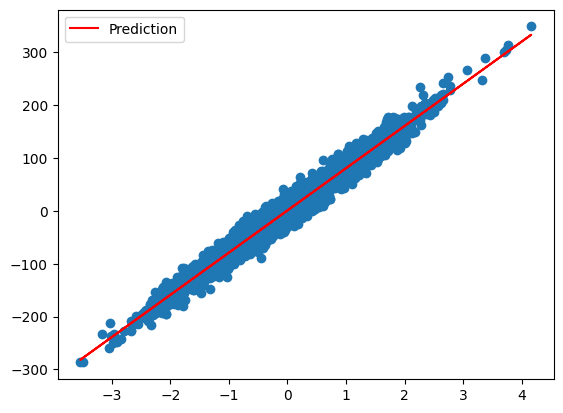

In [26]:
plt.scatter(x,y)
plt.plot(x,y_,label="Prediction",color="red")
plt.legend()
plt.show()

In [27]:
X_test = pd.read_csv('./Data/Linear_X_Test.csv').values
y_test = hypothesis(X_test,theta)

y_test.shape

(1250, 1)

In [29]:
df = pd.DataFrame(data=y_test,columns=["y"])

In [31]:
df.to_csv('./Data/y_prediction.csv',index=False)

## Computing Score

In [32]:
def r2_score(Y,Y_):
    num = np.sum((Y-Y_)**2)
    dem = np.sum((Y-Y.mean())**2)
    score = (1- num/dem)
    return score*100

In [33]:
r2_score(y,y_)

97.09612226971643

## Visualising Loss Function, Gradient Descent, Theta Updates

In [35]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [36]:
theta

array([ 0.6838508 , 79.90361453])

In [49]:
# Loss Actually
T0 = np.arange(-50,50,1)
T1 = np.arange(40,120,1)

T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*x + T0[i,j]
        J[i,j] = np.sum((y-y_)**2)/y.shape[0]
print(J)


[[4352.27799386 4251.91025593 4153.54251799 ... 3928.60741407
  4022.23967613 4117.8719382 ]
 [4273.46651998 4173.09878204 4074.73104411 ... 3849.79594018
  3943.42820225 4039.06046431]
 [4196.65504609 4096.28730816 3997.91957022 ... 3772.9844663
  3866.61672836 3962.24899043]
 ...
 [4135.79450472 4035.42676678 3937.05902885 ... 3712.12392492
  3805.75618699 3901.38844905]
 [4210.98303083 4110.6152929  4012.24755496 ... 3787.31245104
  3880.9447131  3976.57697517]
 [4288.17155695 4187.80381901 4089.43608108 ... 3864.50097715
  3958.13323922 4053.76550128]]


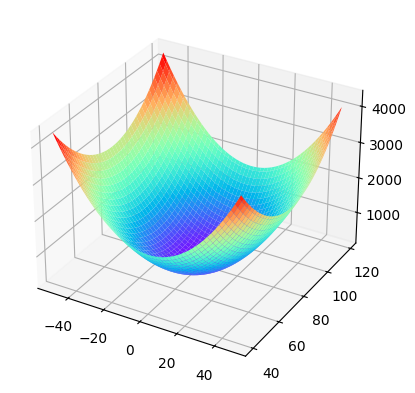

In [50]:
# Visualise the J (Loss)

fig = plt.figure()
axes = fig.add_subplot(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')

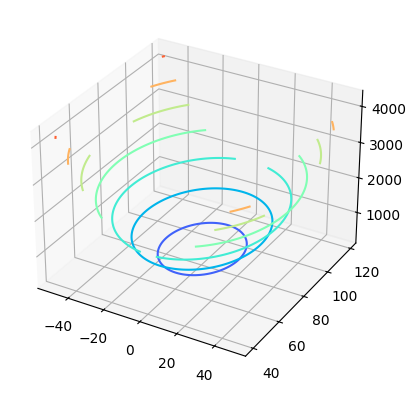

In [51]:

fig = plt.figure()
axes = fig.add_subplot(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')

In [52]:
# Plot the changes in values of Theta

theta_list = np.array(theta_list)
theta_list

array([[0.00000000e+00, 0.00000000e+00],
       [6.83868968e-02, 7.99057369e+00],
       [1.29935104e-01, 1.51820900e+01],
       [1.85328490e-01, 2.16544547e+01],
       [2.35182538e-01, 2.74795829e+01],
       [2.80051181e-01, 3.27221983e+01],
       [3.20432960e-01, 3.74405522e+01],
       [3.56776561e-01, 4.16870707e+01],
       [3.89485801e-01, 4.55089373e+01],
       [4.18924118e-01, 4.89486173e+01],
       [4.45418603e-01, 5.20443292e+01],
       [4.69263640e-01, 5.48304700e+01],
       [4.90724172e-01, 5.73379967e+01],
       [5.10038652e-01, 5.95947707e+01],
       [5.27421684e-01, 6.16258673e+01],
       [5.43066412e-01, 6.34538543e+01],
       [5.57146668e-01, 6.50990426e+01],
       [5.69818898e-01, 6.65797120e+01],
       [5.81223905e-01, 6.79123145e+01],
       [5.91488411e-01, 6.91116567e+01],
       [6.00726467e-01, 7.01910648e+01],
       [6.09040717e-01, 7.11625320e+01],
       [6.16523542e-01, 7.20368525e+01],
       [6.23258085e-01, 7.28237409e+01],
       [6.293191

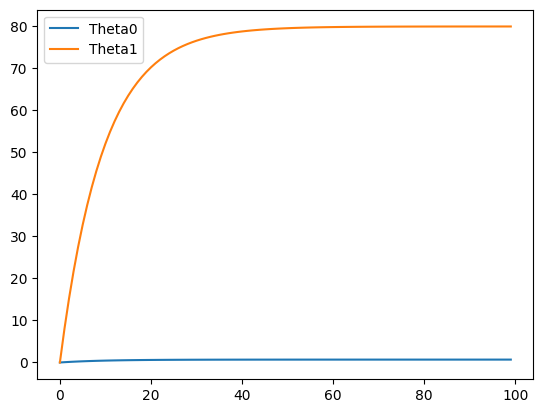

In [53]:
plt.plot(theta_list[:,0],label="Theta0")
plt.plot(theta_list[:,1],label="Theta1")
plt.legend()
plt.show()

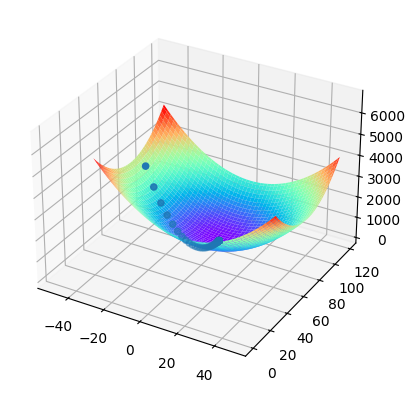

In [55]:
# Trajectory traced by Theta Updates in the Loss Function

fig = plt.figure()
axes = fig.add_subplot(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

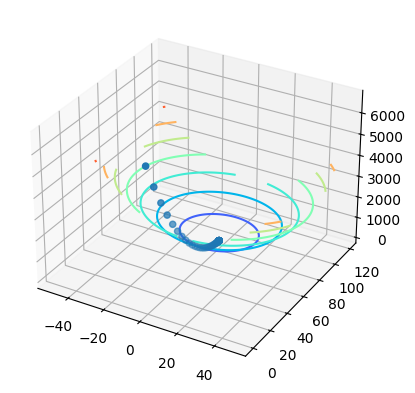

In [56]:

fig = plt.figure()
axes = fig.add_subplot(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

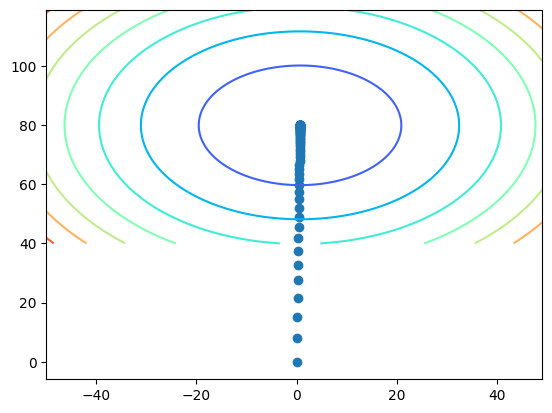

In [58]:
# 2D contour Plot
plt.contour(T0,T1,J,cmap='rainbow')
plt.scatter(theta_list[:,0],theta_list[:,1])
plt.show()